In [10]:
# Exercise 1
# Step 1
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
import pandas as pd
import numpy as np

# Step 2
corpus = ["This is good pizza", "I love Italian pizza", "The best pizza",
          "nice pizza", "Excellent pizza", "I love pizza", "The pizza was alright",
          "disgusting pineapple pizza", "not good pizza", "bad pizza", "very bad pizza",
          "I had better pizza"]

# Step 3
labels = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])  # Convert labels to numpy array

# Step 4
df = pd.DataFrame({'text': corpus, 'sentiment': labels})

# Step 5
vocabulary_size = 50
encoded_corpus = [one_hot(sentence, vocabulary_size) for sentence in corpus]

# Step 6
max_length = max([len(sent.split()) for sent in corpus])
padded_corpus = pad_sequences(encoded_corpus, maxlen=max_length, padding='post')

# Step 7
model = Sequential([
    Embedding(input_dim=vocabulary_size, output_dim=8, input_length=max_length),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Step 8
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Step 9
model.fit(padded_corpus, labels, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 554ms/step - loss: 0.6968 - acc: 0.3333
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6951 - acc: 0.4167
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6935 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6918 - acc: 0.5833
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6902 - acc: 0.5833
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6886 - acc: 0.5833
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6870 - acc: 0.5833
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6854 - acc: 0.6667
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6837 - acc: 0.6667
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6821 - acc: 0.5833
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6805 - ac

In [17]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
import sys

Mounted at /content/gdrive


       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           neutral                        1.0000   
1  5.703010e+17          positive                        0.3486   
2  5.703010e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703010e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

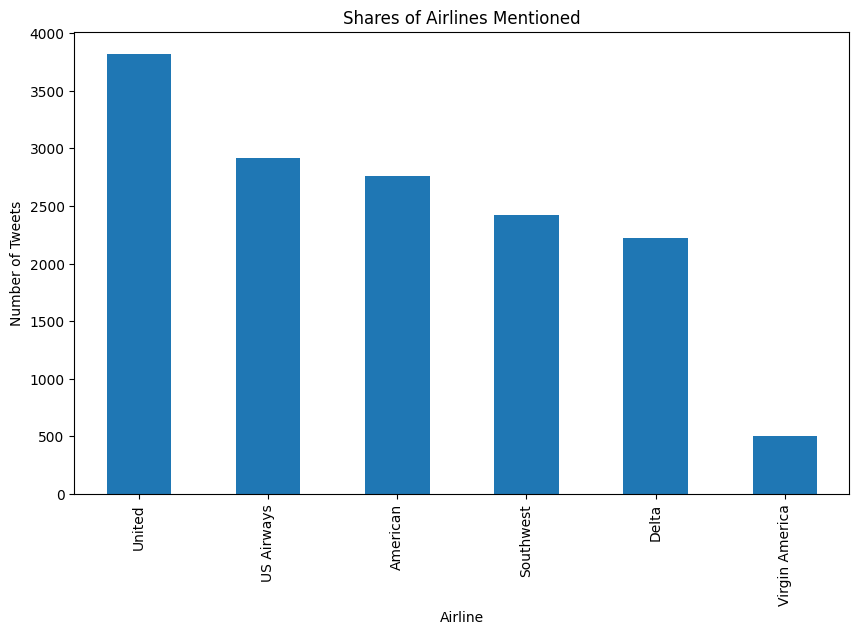

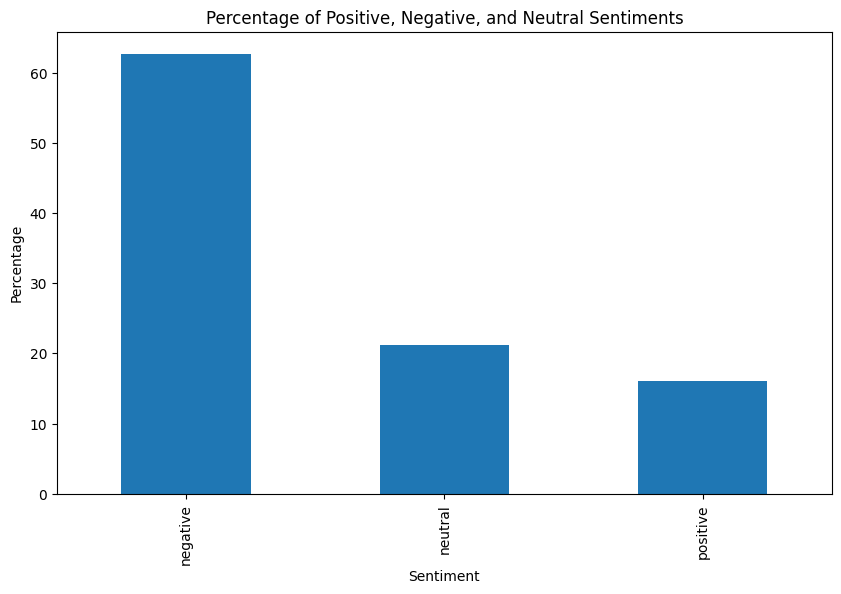

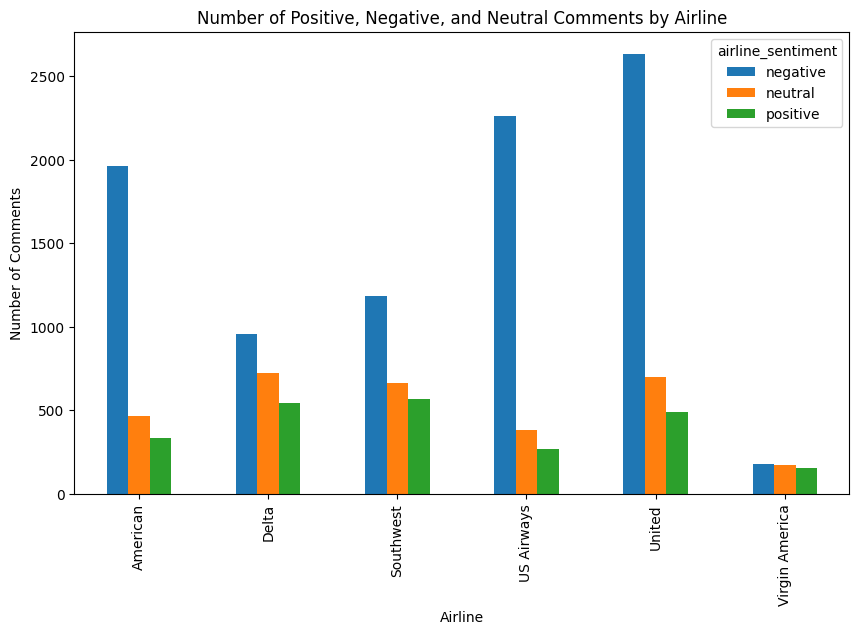

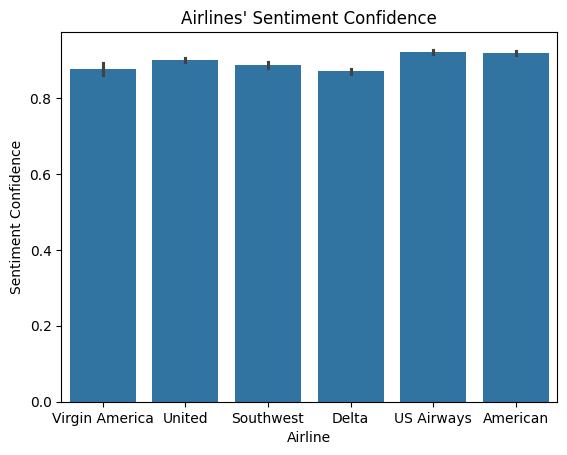

Confusion Matrix:
[[1889    0    0]
 [ 580    0    0]
 [ 459    0    0]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.65      1.00      0.78      1889
     neutral       0.00      0.00      0.00       580
    positive       0.00      0.00      0.00       459

    accuracy                           0.65      2928
   macro avg       0.22      0.33      0.26      2928
weighted avg       0.42      0.65      0.51      2928


Accuracy Score: 0.6451502732240437


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# 1. Load required libraries
import nltk
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 2. Load the data
data = pd.read_csv('/content/gdrive/My Drive//Tweets.csv')

# 3. Take a look at the first five rows
print(data.head())

# 4. Plot the shares of airlines mentioned in the data
airline_shares = data['airline'].value_counts()
airline_shares.plot(kind='bar', figsize=(10, 6))
plt.title('Shares of Airlines Mentioned')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()

# 5. Plot the percentage of positive, negative, and neutral sentiments
sentiment_counts = data['airline_sentiment'].value_counts()
sentiment_percentages = sentiment_counts / len(data) * 100
sentiment_percentages.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Positive, Negative, and Neutral Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()

# 6. Plot the number of positive, negative, and neutral comments by airline
sentiment_by_airline = data.groupby(['airline', 'airline_sentiment']).size().unstack()
sentiment_by_airline.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Positive, Negative, and Neutral Comments by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Comments')
plt.show()

# 7. Using Seaborn, show airlines' sentiment confidence
sns.barplot(x='airline', y='airline_sentiment_confidence', data=data)
plt.title('Airlines\' Sentiment Confidence')
plt.xlabel('Airline')
plt.ylabel('Sentiment Confidence')
plt.show()

# 8. Define the features and labels
features = data['text']
labels = data['airline_sentiment']

# 9. Clean the tweets
cleaned_tweets = []
for tweet in features:
   cleaned_tweet = re.sub(r'@\w+|https?://\S+', '', tweet.lower())
   cleaned_tweets.append(cleaned_tweet)

# 10. Vectorize the tweets
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_tweets)

# 11. Create a train and test (20%) dataset
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# 12. Import the RandomClassifier model
from sklearn.dummy import DummyClassifier

# 13. Define the 'predictions'
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
predictions = dummy_clf.predict(X_test)

# 14. Generate the confusion matrix, the classification report, and the accuracy score
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test, predictions))
print('\nAccuracy Score:', accuracy_score(y_test, predictions))

